<a href="https://colab.research.google.com/github/RainerBerger/MLintro/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Titanic Dataset

There are different versions of the Titanic set available. There is one dataset that is available in Kaggle. Another one is included in Seaborn, and that is the one we have chosen to use here. Two fields that are in Kaggle but not in Seaborne are the Passenger Name and the Ticket Number, which are not useful for machine learning in any case.

In [ ]:
import pandas as pd
import seaborn as sns
titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Note that there are duplicated columns:
*   "survived" stores the same information as "alive"
*   "pclass" stores the same information as "class"
*   "embarked" stores the same information as "embark_town"







There is a Medium article on "Exploratory Data Analysis (EDA) on Titanic Dataset" by Muhammad Dawood (https://muhammaddawoodaslam.medium.com/exploratory-data-analysis-eda-on-titanic-dataset-804034f394e6)

Note the following column definitions:
* Survived: Survival status (0 = No, 1 = Yes)
* Pclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
* Sex: Passenger’s gender
* Age: Passenger’s age
* SibSp: Number of siblings/spouses aboard
* Parch: Number of parents/children aboard
* Fare: Fare paid for the ticket
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* Class: Equivalent to Pclass (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
* Who: Passenger’s category (man, woman, child)
* Adult_male: Whether the passenger is an adult male or not (True or False)
* Deck: Cabin deck
* Embark_town: Port of embarkation (Cherbourg, Queenstown, Southampton)
* Alive: Survival status (yes or no)
* Adult_male: Whether the passenger is an adult male or not (True or False)
* Alone: Whether the passenger is alone or not (True or False)


In [ ]:
# Check the dimensions of the dataset
print(titanic_data.shape)

# Get summary statistics of numerical variables
print(titanic_data.describe())

# Check the data types of variables
print(titanic_data.dtypes)


(891, 15)
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category


## Null Values

In [ ]:
# Check for missing values
print(titanic_data.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


## Survival Statistics

In [ ]:
survivors = sum(titanic_data.survived)
total_passengers = titanic_data.shape[0]
survival_rate = 100.0*survivors/total_passengers

print(f"Number of survivors: {survivors}")
print(f"Survival rate: {survival_rate}")

Number of survivors: 342
Survival rate: 38.38383838383838


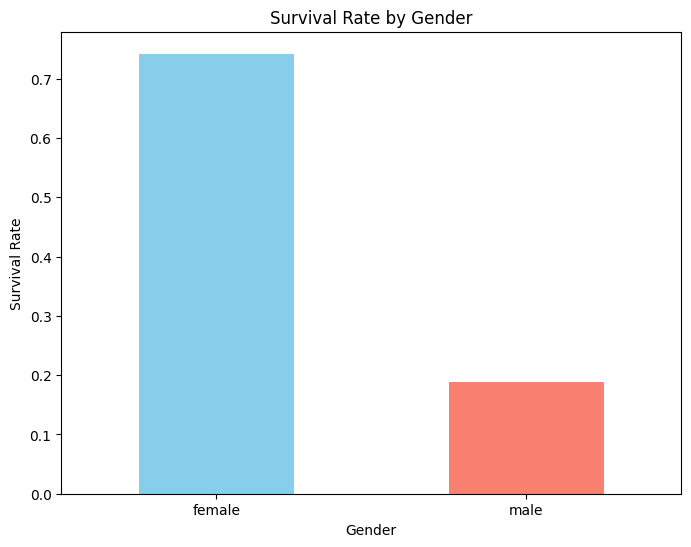

In [ ]:
# prompt: generate a bar chart of the survival rate by gender

import matplotlib.pyplot as plt

# Calculate survival rate by gender
survival_by_gender = titanic_data.groupby('sex')['survived'].mean()

# Create the bar chart
plt.figure(figsize=(8, 6))
survival_by_gender.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


<ipython-input-7-6b39e6817c8a>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class = titanic_data.groupby('class')['survived'].mean()


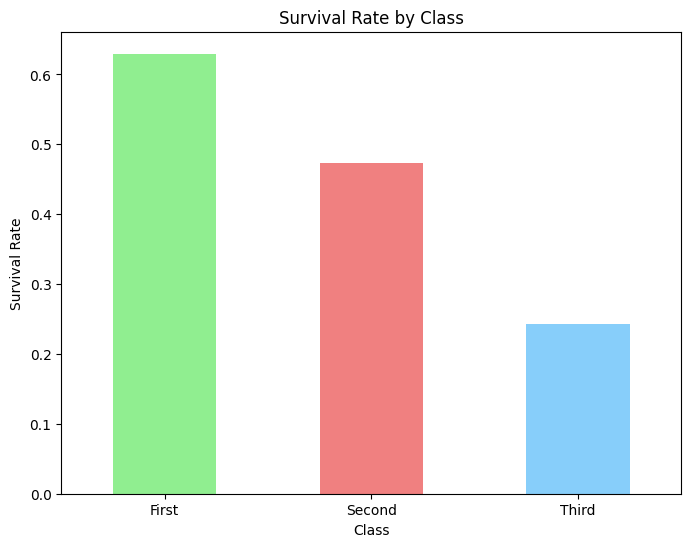

In [ ]:
# prompt: generate a bar chart of the survival rate by class

import matplotlib.pyplot as plt
# Calculate survival rate by class
survival_by_class = titanic_data.groupby('class')['survived'].mean()

# Create the bar chart
plt.figure(figsize=(8, 6))
survival_by_class.plot(kind='bar', color=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


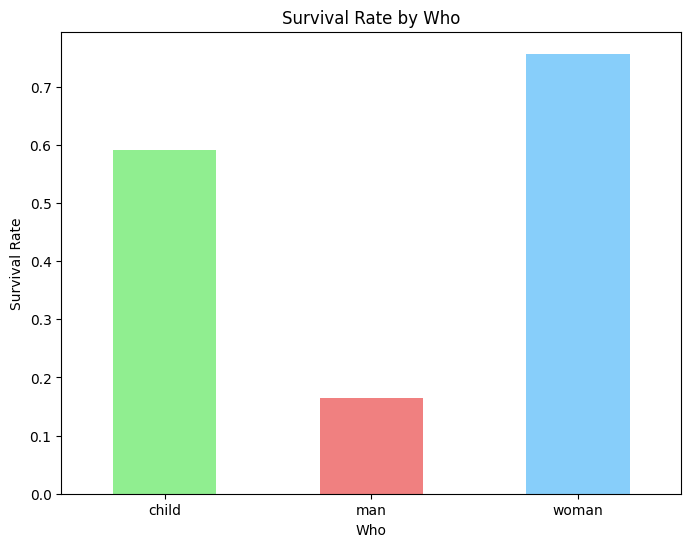

In [ ]:
# prompt: generate a bar chart of the survival rate by who

import matplotlib.pyplot as plt
# Calculate survival rate by who
survival_by_who = titanic_data.groupby('who')['survived'].mean()

# Create the bar chart
plt.figure(figsize=(8, 6))
survival_by_who.plot(kind='bar', color=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Survival Rate by Who')
plt.xlabel('Who')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


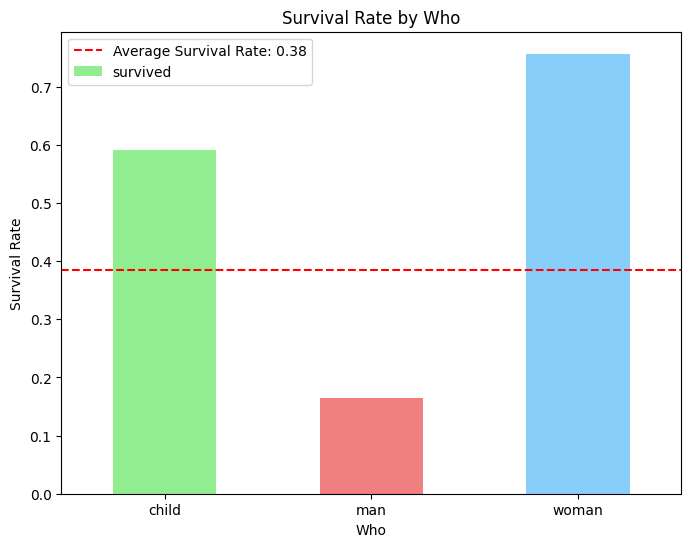

In [ ]:
# prompt: generate a bar chart of the survival rate by who and show the average survival rate

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (previous code)

# Calculate survival rate by who
survival_by_who = titanic_data.groupby('who')['survived'].mean()

# Create the bar chart
plt.figure(figsize=(8, 6))
survival_by_who.plot(kind='bar', color=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Survival Rate by Who')
plt.xlabel('Who')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

# Add average survival rate to the plot
average_survival_rate = titanic_data['survived'].mean()
plt.axhline(average_survival_rate, color='red', linestyle='--', label=f'Average Survival Rate: {average_survival_rate:.2f}')
plt.legend()

plt.show()


<ipython-input-10-7851a8b9f5cf>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='embark_town', y='survived', data=titanic_data, ci=None)  # ci=None removes confidence intervals


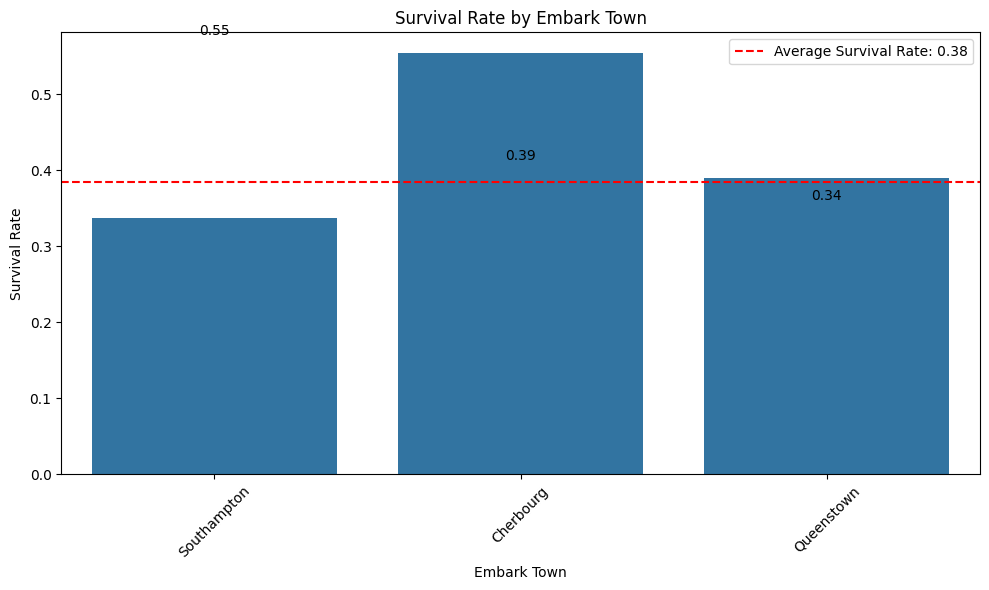

In [ ]:
# prompt: generate a panel plot showing the survival rates by embark town and show the average survival rate

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming titanic_data is already loaded as in the provided code

# Calculate survival rate by embark_town
survival_by_embark_town = titanic_data.groupby('embark_town')['survived'].mean()

# Create the panel plot
plt.figure(figsize=(10, 6))
sns.barplot(x='embark_town', y='survived', data=titanic_data, ci=None)  # ci=None removes confidence intervals
plt.title('Survival Rate by Embark Town')
plt.xlabel('Embark Town')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

# Add average survival rate as a horizontal line
average_survival_rate = titanic_data['survived'].mean()
plt.axhline(average_survival_rate, color='red', linestyle='--', label=f'Average Survival Rate: {average_survival_rate:.2f}')

# Display the average survival rate on the plot
for i, rate in enumerate(survival_by_embark_town):
  plt.text(i, rate + 0.02, f'{rate:.2f}', ha='center', va='bottom') # Added text annotation

plt.legend()
plt.tight_layout()
plt.show()


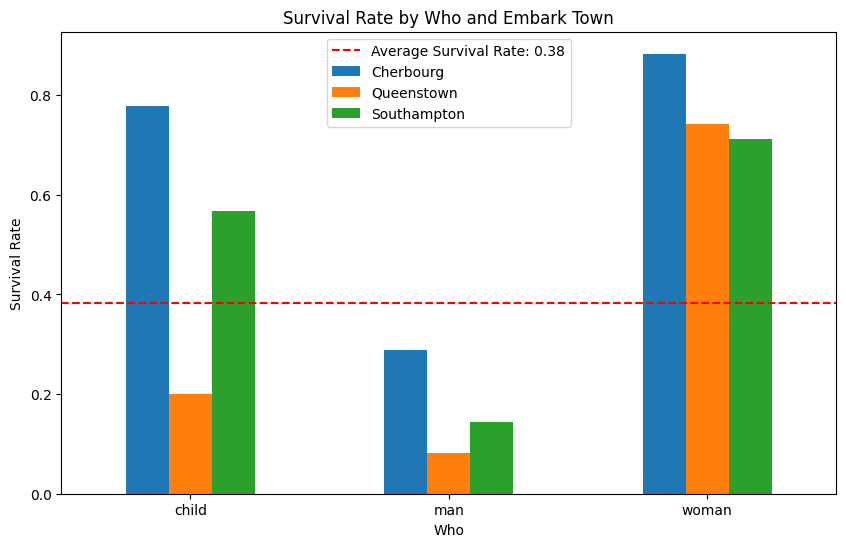

In [ ]:
# prompt: generate a bar chart of the survival rate by who broken down by embark town and show the average survival rate

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate survival rate by who and embark_town
survival_by_who_embark = titanic_data.groupby(['who', 'embark_town'])['survived'].mean().unstack()

# Create the bar chart
survival_by_who_embark.plot(kind='bar', figsize=(10, 6))
plt.title('Survival Rate by Who and Embark Town')
plt.xlabel('Who')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.legend(title='Embark Town')

# Add average survival rate to the plot
average_survival_rate = titanic_data['survived'].mean()
plt.axhline(average_survival_rate, color='red', linestyle='--', label=f'Average Survival Rate: {average_survival_rate:.2f}')
plt.legend()

plt.show()


<ipython-input-12-2fa3f8896162>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pclass_by_embark_town = titanic_data.groupby(['embark_town', 'class'])['class'].count().unstack()


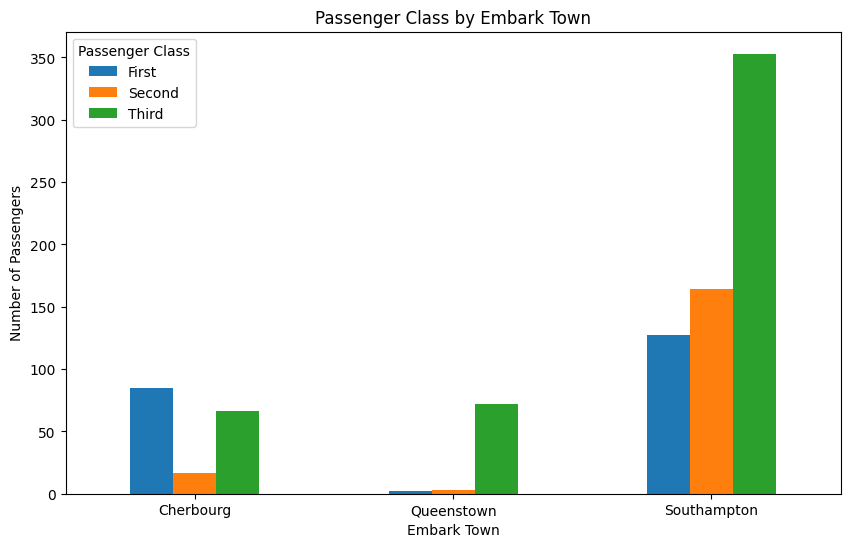

In [ ]:
# prompt: generate a bar chart of the passenger class broken down by embark town

import matplotlib.pyplot as plt
# ... (previous code)

# Passenger class by embark town
pclass_by_embark_town = titanic_data.groupby(['embark_town', 'class'])['class'].count().unstack()

# Create the bar chart
pclass_by_embark_town.plot(kind='bar', figsize=(10, 6))
plt.title('Passenger Class by Embark Town')
plt.xlabel('Embark Town')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Passenger Class')
plt.show()


<ipython-input-17-3169fa84ff70>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class_embark = titanic_data.groupby(['class', 'embark_town'])['survived'].mean().unstack()


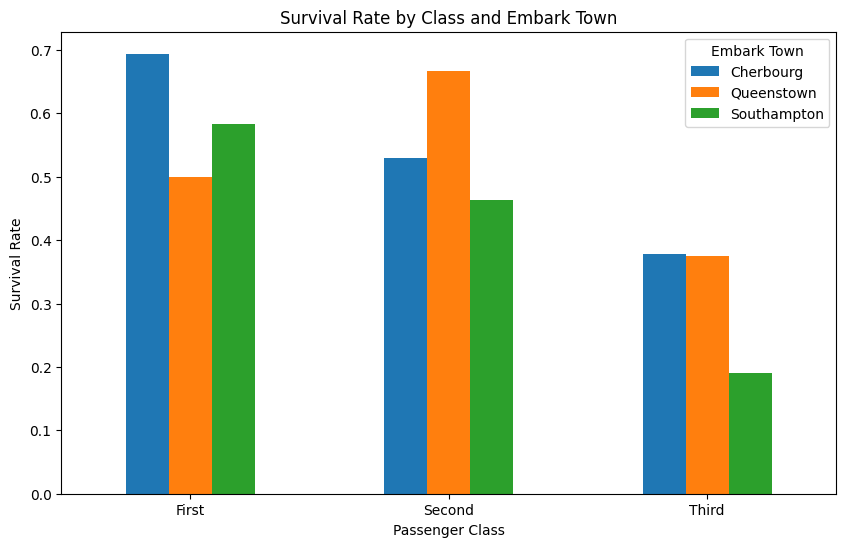

In [ ]:
# prompt: generate a bar chart of the survival rate broken down first by class and then by embark town

import matplotlib.pyplot as plt
# Assuming titanic_data is already loaded as in the provided code

# Group by class and embark town, then calculate the survival rate
survival_by_class_embark = titanic_data.groupby(['class', 'embark_town'])['survived'].mean().unstack()

# Create the bar chart
survival_by_class_embark.plot(kind='bar', figsize=(10, 6))
plt.title('Survival Rate by Class and Embark Town')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.legend(title='Embark Town')
plt.show()
